# 📌ACTIVIDAD 3: CREAR UN SISTEMA TASADOR DE VIVIENDAS.

### DEFINIR Y RECOPILAR DATOS
En primer lugar debemos ponernos de acuerdo de manera que cada uno de nosotros piense una
característica que: <br><br>
• Pueda influir en el precio de una vivienda.<br><br>
• Sea una información que tengamos la capacidad de recolectar.<br><br>
ENTREGA 5: Añade al documento enlace enlace: <br><br>
a) En la hoja de cálculo "datos_viviendas.xlsl" en la hoja datos, añade una columna cuyo
prefijo tenga tus iniciales. Ya tiene estas nueve: josrosrod_autor, josrosrod_origen,
josrosrod_municipio, josrosrod_dia, josrosrod_mes, josrosrod_año, josrosrod_lat,
josrosrod_lon, josrosrod_precio<br><br>
b) En la hoja "descripción" añade una descripción del significado de esa columna y de cómo se
puede conseguir. Ya tendrás anotaciones de las características que están añadidas.<br><br>
Cuando ya tengamos definidas las características que vamos a utilizar para esta actividad, vamos a
recolectar datos, al menos 10 cada uno. Intentando completar la información que no dispongamos
(intentaremos no inventar nada, de manera que cuando algo no lo sepamos, tendremos que indicar de
donde lo hemos conseguido). No puedes dejar más de un valor ausente en tus datos.

ENTREGA: <br><br>
a0) Añade a la hoja de cálculo 10 ejemplos y aporta una columna.<br><br>
a) Análisis y preprocesamiento de datos:<br><br>
• Análisis de datos: histogramas, boxplots, cantidad de datos ausentes, presencia de
outliers.<br><br>
• Codificación de categóricas: label-encoding o one-hot-encoding.<br><br>
• Detección e imputación de ausentes.<br><br>
• Detección e imputación de anomalías.<br><br>
• Escalado de numéricas.<br><br>
• Debes ir creando un pipeline de manera que se le facilite uno de los ejemplos y lo
preprocese para dárselo al modelo.<br><br>
a) Selección de características:<br><br>
• Matriz de correlaciones y mapa de calor: más fácil de interpretar si dejas el target como
la primera característica.<br><br>
• Estudio estadístico univariado (eliminar características con poca influencia en target).<br><br>
• Estudio de colinealidad por parejas (eliminar alta correlación entre predictoras).<br><br>
c) Selección de modelos de regresión: debes considerar al menos 5 diferentes y uno de ellos el
método de mínimos cuadrados. Recuerda que tienes LinearRegressor, SGDRegressor, Ridge,
Lasso, ElasticNet, K-NN, polinómico...<br><br>
d) Estudio de varianza de modelos con CV.<br><br>
e) Seleccionar los dos que mejor desempeño muestren justificando su elección.<br><br>
f) Configuración de hiperparámetros con grid-search en los mejores 2 modelos seleccionados.<br><br>
f) Estudio final de errores en las predicciones y gráfico de importancia de características.<br><br>
g) Selección justificada del mejor y su descripción:<br><br>
• Qué predictoras utiliza.<br><br>
• Una descripción de su utilización y procesos que realiza (preprocesamiento, ...).<br><br>
• Qué desempeño alcanza en train y test (indica también la métrica empleada)<br><br>
• Una valoración final de tu modelo según los resultados obtenidos.<br><br>
h) Guarda el modelo en un fichero con el nombre <iniciales>_modelo_u02_p03_a3.joblib
donde <iniciales> son las 3 primeras letras del nombre y apellidos, en mi caso sería
"josrosrod_modelo_u02_p03_a3.joblib".<br><br>
La entrega de esta última actividad es el 70% de la nota de la práctica y se valora:<br><br>
• 50% puntos por la entrega: la realización de las actividades propuestas.<br><br>
• Al modelo que entregues se le pedirá que realice 10 predicciones con datos probablemente no
vistos. Según el error promedio que cometa se le asignará posición en un ranking. En función
de la posición que ocupe (lo bien que lo haga), conseguirá más o menos puntuación adicional
hasta completar el 20% restante


## 1. Carga de datos

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Cargar datos (modificar con el nombre de tu archivo)
df = pd.read_excel("recursos/datos_viviendas.xlsx")
df.head()
target = 'josrosrod_precio'
categoricas = ['josrosrod_origen', 'jorosrod_municipio','alvbelnav_iluminacion','luctarcom_orientacion']
numericas = ['josrosrod_dia','josrosrod_mes', 'josrosrod_año','ricmirber_longitud','josrosrod_lat','josrosrod_precio','davsoreng_duplex','alegarsal_terraza','rafmaralf_baños','samartlop_superficie','davroctau_planta','juamarxxx_trastero','robripcon_habitaciones','omapasvac_ascensor','elilopper_distanciaCentro','rauramesc_airecentral','guifue_parking']

## 2. Análisis exploratorio (gráficos, valores ausentes, outliers)


In [23]:
print(df.describe())

       josrosrod_dia  josrosrod_mes  josrosrod_año  josrosrod_precio  \
count     141.000000     141.000000     141.000000      1.410000e+02   
mean       15.657143       2.500000    2021.278571      3.436194e+05   
std         6.128122       2.306822      10.663736      5.937963e+05   
min         1.000000       1.000000    1963.000000      5.000000e+03   
25%        13.000000       2.000000    2025.000000      1.450000e+05   
50%        16.000000       2.000000    2025.000000      2.100000e+05   
75%        20.000000       2.000000    2025.000000      3.000000e+05   
max        31.000000      12.000000    2025.000000      5.000000e+06   

       rafmaralf_baños  samartlop_superficie  robripcon_habitaciones  \
count       140.000000            141.000000              141.000000   
mean          2.093525            128.064286                3.314286   
std           1.418744             76.136176                1.464268   
min           1.000000             12.000000                1.0

In [24]:
print(df.isnull().sum())

josrosrod_origen             4
jorosrod_municipio           4
josrosrod_dia                3
josrosrod_mes                3
josrosrod_año                3
ricmirber_longitud           3
josrosrod_lat                3
josrosrod_precio             3
alvbelnav_iluminacion        4
davsoreng_duplex             3
alegarsal_terraza            3
rafmaralf_baños              4
luctarcom_orientacion        4
samartlop_superficie         3
davroctau_planta             4
juamarxxx_trastero           4
robripcon_habitaciones       3
omapasvac_ascensor           4
elilopper_distanciaCentro    3
rauramesc_airecentral        3
guifue_parking               3
dtype: int64


In [25]:
print(df.columns)


Index(['josrosrod_origen', 'jorosrod_municipio', 'josrosrod_dia',
       'josrosrod_mes', 'josrosrod_año', 'ricmirber_longitud', 'josrosrod_lat',
       'josrosrod_precio', 'alvbelnav_iluminacion', 'davsoreng_duplex',
       'alegarsal_terraza', 'rafmaralf_baños', 'luctarcom_orientacion',
       'samartlop_superficie', 'davroctau_planta', 'juamarxxx_trastero',
       'robripcon_habitaciones', 'omapasvac_ascensor',
       'elilopper_distanciaCentro', 'rauramesc_airecentral', 'guifue_parking'],
      dtype='object')


In [26]:
print(df.shape)


(144, 21)


In [27]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   josrosrod_origen           140 non-null    object 
 1   jorosrod_municipio         140 non-null    object 
 2   josrosrod_dia              141 non-null    float64
 3   josrosrod_mes              141 non-null    float64
 4   josrosrod_año              141 non-null    float64
 5   ricmirber_longitud         141 non-null    object 
 6   josrosrod_lat              141 non-null    object 
 7   josrosrod_precio           141 non-null    float64
 8   alvbelnav_iluminacion      140 non-null    object 
 9   davsoreng_duplex           141 non-null    object 
 10  alegarsal_terraza          141 non-null    object 
 11  rafmaralf_baños            140 non-null    float64
 12  luctarcom_orientacion      140 non-null    object 
 13  samartlop_superficie       141 non-null    float64

In [28]:
print(df.duplicated())
df = df.drop_duplicates()
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141     True
142     True
143    False
Length: 144, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
137    False
138    False
139    False
140    False
143    False
Length: 142, dtype: bool


In [29]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(142, 21)
(136, 21)


### Visualizacion de datos


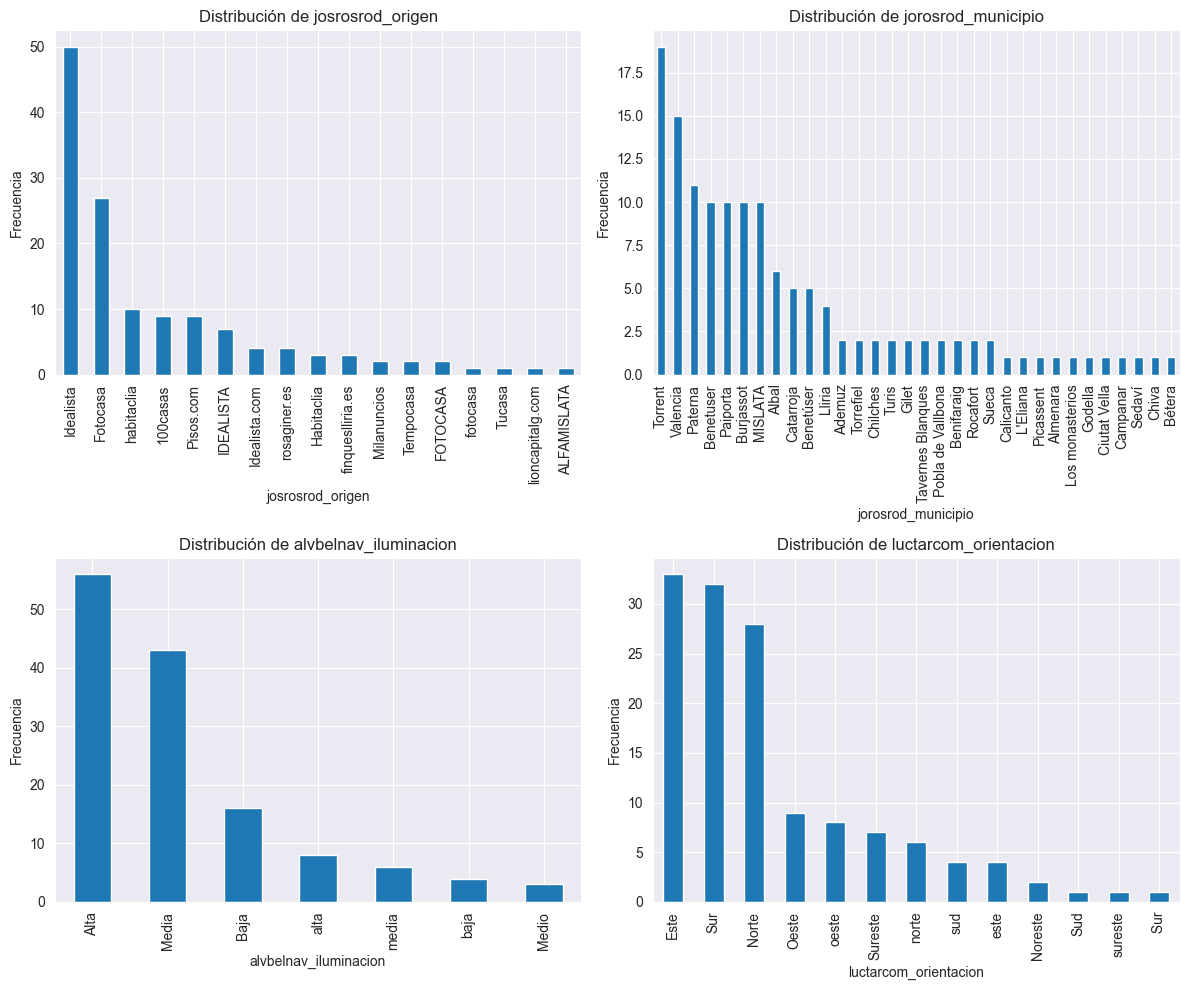

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(categoricas):
    df[var].value_counts().plot(kind='bar', ax=axes[i])  # Gráfico de barras
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_ylabel('Frecuencia')

for j in range(len(categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df['alvbelnav_iluminacion'] = df['alta'].replace("alta", "Alta")
df['alvbelnav_iluminacion'] = df['Media'].replace("Media", "media")

df['alvbelnav_iluminacion'] = df['alta'].replace("alta", "Alta")

print(df['gender'].value_counts())

## 3. Preprocesamiento (codificación, imputación, escalado)


In [3]:
# Separar variables numéricas y categóricas
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

# Pipeline de preprocesamiento
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

## 4. Selección de características


In [4]:
# División en train y test
y = df['josrosrod_precio']  # Modifica 'target' con la variable objetivo correcta
X = df.drop(columns=['josrosrod_precio'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Entrenamiento de modelos de regresión


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Idealista'

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

In [5]:
# Entrenar y evaluar modelos
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    results[name] = np.mean(scores)
    print(f"{name}: R² medio = {np.mean(scores):.4f}")

NameError: name 'models' is not defined

## 6. Evaluación y selección de modelos


In [ ]:
# Seleccionar los dos mejores modelos
best_models = sorted(results.items(), key=lambda x: x[1], reverse=True)[:2]
print("\nMejores modelos:", best_models)

## 7. Optimización de hiperparámetros


In [ ]:
# Grid Search para ajuste de hiperparámetros
param_grid = {
    'Ridge': {'regressor__alpha': [0.1, 1, 10]},
    'KNN': {'regressor__n_neighbors': [3, 5, 7]}
}

## 8.  Guardado del modelo final

In [ ]:
best_estimators = {}
for name, _ in best_models:
    model = models[name]
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"{name}: Mejor hiperparámetro {grid_search.best_params_}")

# Evaluación final del mejor modelo
final_model = best_estimators[best_models[0][0]]
y_pred = final_model.predict(X_test)
print(f"Mejor modelo: {best_models[0][0]}")
print(f"R² en test: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE en test: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Guardar el modelo
joblib.dump(final_model, "SAM_ART_LOP_modelo_u02_p03_a3.joblib")